In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

clustering이란 여러 개의 데이터가 있을 때 군집화 하는 것을 의미한다.  
비슷한 데이터끼리 묶어놓으면 관리하기 쉽다는 장점이 있다. 예를 들면 학원을 운영할 때 고급반, 중급반, 초급반을 나눠 적절히 분류해서 관리하는 것  
비지도 학습(unsupervised learning) 알고리즘은 정확한 방향성이 일치하지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화하는 알고리즘이다.  
=> kMeans 알고리즘이 대표적인 비지도 학습 알고리즘이다.  

pip install scikit-learn => 머신러닝 알고리즘을 사용하기 위한 라이브러리  

In [2]:
# clustering(군집화)에 필요한 라이브러리를 import한다.
from sklearn.cluster import KMeans

clustering을 실행할 데이터를 만든다.

In [3]:
'''
df = pd.DataFrame(columns=['x', 'y'])
df.loc[0] = [2, 3]
df.loc[1] = [2, 11]
df.loc[2] = [2, 18]
df.loc[3] = [4, 5]
df.loc[4] = [4, 7]
df.loc[5] = [5, 3]
df.loc[6] = [5, 15]
df.loc[7] = [6, 6]
df.loc[8] = [6, 8]
df.loc[9] = [6, 9]
df.loc[10] = [7, 2]
df.loc[11] = [7, 4]
df.loc[12] = [7, 5]
df.loc[13] = [7, 17]
df.loc[14] = [7, 18]
df.loc[15] = [8, 5]
df.loc[16] = [8, 4]
df.loc[17] = [9, 10]
df.loc[18] = [9, 11]
df.loc[19] = [9, 15]
df.loc[20] = [9, 19]
df.loc[21] = [10, 5]
df.loc[22] = [10, 8]
df.loc[23] = [10, 18]
df.loc[24] = [12, 6]
df.loc[25] = [13, 5]
df.loc[26] = [14, 11]
df.loc[27] = [15, 6]
df.loc[28] = [15, 18]
df.loc[29] = [18, 12]
df
'''
pass

In [4]:
# df.to_csv('./data/cluster.csv', index=False)
df = pd.read_csv('./data/cluster.csv')
df.head()

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7


In [5]:
# index: 데이터프레임의 인덱스를 얻어온다.
print(df.index)
print(list(df.index))

RangeIndex(start=0, stop=30, step=1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [6]:
# columns: 데이터프레임의 컬럼 이름을 얻어온다.
print(df.columns)

Index(['x', 'y'], dtype='object')


In [7]:
# values: 데이터프레임에 저장된 데이터만 얻어온다.
print(type(df.values))
print(df.values)
point = df.values

<class 'numpy.ndarray'>
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


In [8]:
# values: 데이터프레임에 저장된 데이터만 얻어온다.
print(df.values)

[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


clustering을 실행할 데이터 시각화

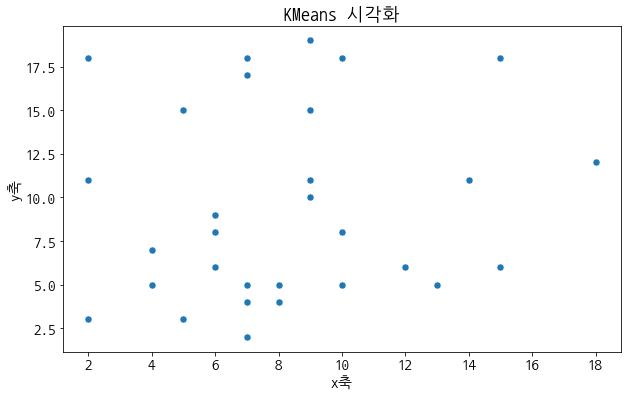

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', s=50)
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

KMeans를 수행하기 위해서는 클러스터링을 수행할 데이터의 주제를 결정하고 얼마나 많은 클러스터를 만들지 결정한다.  
이때, 데이터가 정확할수록 유리하게 클러스터링을 할 수 있고 클러스터링을 수행하는 방법은 무작위 중심(cenrtoid)값 선택, KMeans++ 법등 다양한 방법이 있다.  

무작위 중심(cenrtoid)값 선택 알고리즘을 이용한 클러스터링  
중심에 가까운 데이터를 클러스터에 포함시키고 중심을 클러스터의 중앙으로 이동시키는 과정을 반복해서 수행하면 되는데  
더 이상 중심의 위치가 변하지 않을 때까지 반복하는 것이 일반적인 방법이고  
이러한 과정을 거치면 결과적으로 완벽하게 군집화된 클러스터를 얻을 수 있다.


클러스터링을 위한 무작위 중심을 결정하는 방법은 가장 먼저 특정 노드(데이터)를 선택해서 클러스터의 중심으로 설정(파랑색)한다.  
그 후에는 선택된 노드(파랑색)에서 가장 먼 노드(노랑색)를 두 번째 클러스터의 중심으로 설정한다.  
그 다음부터는 이미 선택된 중심점들로부터 가장 멀리 떨어져있는 노드(녹색)를 선택해서 클러스터의 중심으로 설정한다.  


1, 2, 3 세 개의 클러스터가 존재한다고 가정하고 하나의 데이터를 선택해서 세 개의 클러스터 중심 중에서 가장 가까운 클러스터에 속하도록 만드는 작업을 반복해서 실행한다.  
이러한 과정을 전체 데이터에 대해서 실행하면 아래 그림과 같을 것이다.  


대략적으로 군집화가 완료되면 완벽한 군집화를 위해 중심의 위치를 데이터의 중간으로 이동시킨다.  
중심의 위치를 이동시키고 다시 모든 데이터에 대해서 어떤 클러스터에 가까운지를 하나씩 체크해서 만약 특정 데이터가 다른 클러스터의 중심에 더 가깝다면 그 클러스터에 속하도록 설정하면 된다.  
클러스터 중심의 위치가 더 이상 바뀌지 않으면 클러스터링이 끝난다.  

KMenas 알고리즘을 이용해서 클러스터 4개를 생성한다.

In [10]:
# sklearn 라이브러리의 KMeans 알고리즘을 이용해서 모델을 만들고 데이터프레임의 데이터를 학습시킨다.
# n_clusters 속성에 군집화 할 클러스터의 개수를 지정해서 모델을 만들고 fit() 메소드로 학습시킨다.
kmeans = KMeans(n_clusters=4).fit(point)
print(kmeans)
# cluster_centers_: KMeans 알고리즘에 의해 계산된 클러스터의 중심 위치를 얻어온다.
print(kmeans.cluster_centers_)
# labels_: KMeans 알고리즘에 의해 각각의 데이터가 속하는 클러스를 얻어온다.
print(kmeans.labels_)

KMeans(n_clusters=4)
[[11.14285714  7.28571429]
 [ 7.         17.14285714]
 [ 5.53846154  5.53846154]
 [15.66666667 13.66666667]]
[2 2 1 2 2 2 1 2 2 2 2 2 2 1 1 2 2 0 0 1 1 0 0 1 0 0 3 0 3 3]


In [11]:
df['cluster'] = kmeans.labels_
df

,x,y,cluster
0,2,3,2
1,2,11,2
2,2,18,1
3,4,5,2
4,4,7,2
5,5,3,2
6,5,15,1
7,6,6,2
8,6,8,2
9,6,9,2


In [12]:
# df.to_csv('./data/save.csv', index=False)

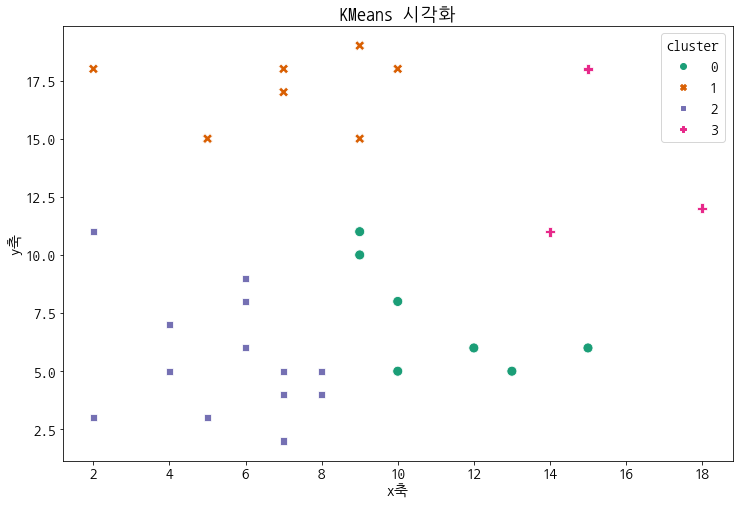

In [13]:
plt.figure(figsize=(12, 8))
# hue 속성을 지정하면 서로 다른 색상으로 데이터를 시각화 할 수 있다.
# palette 속성을 지정하면 시각화되는 데이터의 색상을 변경할 수 있다. 종류는 palette.png 파일 참조
# style 속성을 지정하면 시각화되는 데이터의 모양을 서로 다르게 변경할 수 있다.
sns.scatterplot(data=df, x='x', y='y', s=100, hue='cluster', palette='Dark2', style='cluster')
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()